# Predicting Suitable Solar Energy Potential in Buildings of Karachi
#### Solar installation stakeholders face significant challenges in assessing building potential, often requiring costly and time-consuming site surveys. This project addresses this challenge by analyzing the annual solar energy potential for Karachi's buildings using features from the data set. 

## Business Value 

#### Reduce assessment costs by quickly screening buildings for solar potential.#### 	Support urban planning and renewable energy initiative
#### Help property owners evaluate solar investment opportunities.
#### Enable scalable solar adoption strategies across Karachi.i 


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor,plot_tree
sns.set(color_codes=True)

df=pd.read_csv("karachi_rooftop_solar_potential.csv")
#To display the top 5 rows df.head(5)

df.head(5)



,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,Comment
0,1cbf6d20-5926-4fff-8817-2afb7d8b9803,Karachi,75.93,10.41,2.02,3136.49,peri-urban settlement,5.0,14.76,1553.0,NaN,NaN
1,ed9e4c08-8c4e-425f-89d5-2d7ed8149fc2,Karachi,73.05,6.07,1.18,1827.58,peri-urban settlement,5.0,21.47,1553.0,NaN,NaN
2,4093dab6-efae-48f5-8441-7342d5756467,Karachi,77.26,27.13,5.26,8383.77,commercial,5.0,8.61,1593.0,NaN,NaN
3,c26e8c10-cf31-4bc3-a6c5-a1956b975d8e,Karachi,288.77,110.14,21.35,33533.84,multi family residential,5.0,14.02,1571.0,NaN,NaN
4,266e1e1d-4630-4e18-ac63-6a3b80e416ee,Karachi,6.65,0.00,0.00,0.00,peri-urban settlement,5.0,4.92,NaN,NaN,NaN


# Data Source 
#### This dataset contains solar rooftop potential data at individual building structure levels for a sample area of interest in Karachi. The data was gathered by extracting building rooftop footprint polygons from very high-resolution satellite stereo imagery of 0.5m resolution. The rooftop angle, obstruction, and shading were taken into account during suitable area calculation


# Source (https://energydata.info)

URL:https://energydata.info/dataset/karachi-rooftop-solar-potential-mapping 

In [2]:
df.dtypes


uuid                           object
City                           object
Surface_area                  float64
Potential_installable_area    float64
Peak_installable_capacity     float64
Energy_potential_per_year     float64
Assumed_building_type          object
Estimated_tilt                float64
Estimated_building_height     float64
Estimated_capacity_factor     float64
Unit_installation_price       float64
Comment                        object
dtype: object

- Surface_area: Total Surface area 
- Potential_installable_area:Area in which panel can be placed 
- Estimated_building_height:Height of Building 
- Estimated_tilt:the angle at which panel is placed 
- Assumed_building_type (encoded):Type of building 
- Peak_installable_capacity:maximum capacity of kv to install  


In [3]:
print(df.count())

uuid                          296688
City                          296688
Surface_area                  296688
Potential_installable_area    296688
Peak_installable_capacity     296688
Energy_potential_per_year     296688
Assumed_building_type         296688
Estimated_tilt                296688
Estimated_building_height     295719
Estimated_capacity_factor     263704
Unit_installation_price            0
Comment                          410
dtype: int64


In [7]:
## city is duplicate for all
df2 = df.pivot_table(index = ['City'], aggfunc ='size')
print("Get count of duplicate values in multiple columns:\n", df2)

Get count of duplicate values in multiple columns:
 City
Karachi    296688
dtype: int64


In [78]:
df=df.drop(['Comment', 'uuid','Unit_installation_price','City'], axis=1) 
df.head(5)

,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor
0,75.93,10.41,2.02,3136.49,peri-urban settlement,5.0,14.76,1553.0
1,73.05,6.07,1.18,1827.58,peri-urban settlement,5.0,21.47,1553.0
2,77.26,27.13,5.26,8383.77,commercial,5.0,8.61,1593.0
3,288.77,110.14,21.35,33533.84,multi family residential,5.0,14.02,1571.0
4,6.65,0.00,0.00,0.00,peri-urban settlement,5.0,4.92,NaN


In [8]:



duplicate_rows_df = df [df.duplicated()] 

print("number of duplicate rows:", duplicate_rows_df.size)



number of duplicate rows: 0


In [80]:
print(df.isnull().sum()) 


Surface_area                      0
Potential_installable_area        0
Peak_installable_capacity         0
Energy_potential_per_year         0
Assumed_building_type             0
Estimated_tilt                    0
Estimated_building_height       969
Estimated_capacity_factor     32984
dtype: int64


In [81]:
df['Estimated_building_height'] = df['Estimated_building_height'].fillna(df.groupby('Assumed_building_type')['Estimated_building_height'].transform('mean'))
#Median
df['Estimated_capacity_factor'] = df['Estimated_capacity_factor'].fillna(df.groupby('Assumed_building_type')['Estimated_capacity_factor'].transform('mean'))

In [82]:
print(df.isnull().sum()) 

Surface_area                  0
Potential_installable_area    0
Peak_installable_capacity     0
Energy_potential_per_year     0
Assumed_building_type         0
Estimated_tilt                0
Estimated_building_height     0
Estimated_capacity_factor     0
dtype: int64


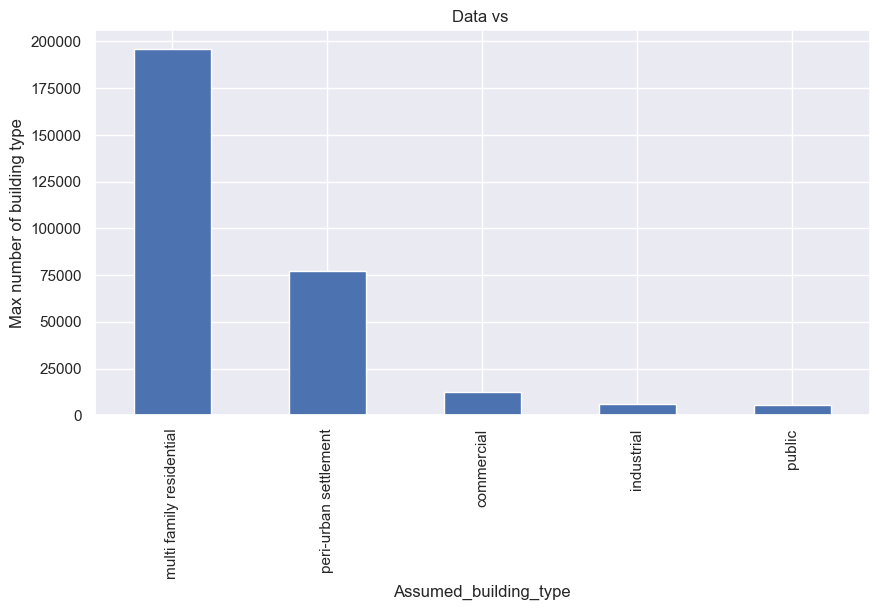

In [84]:
df.Assumed_building_type.value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Data vs ") 
plt.ylabel('Max number of building type') 
plt.xlabel('Assumed_building_type');

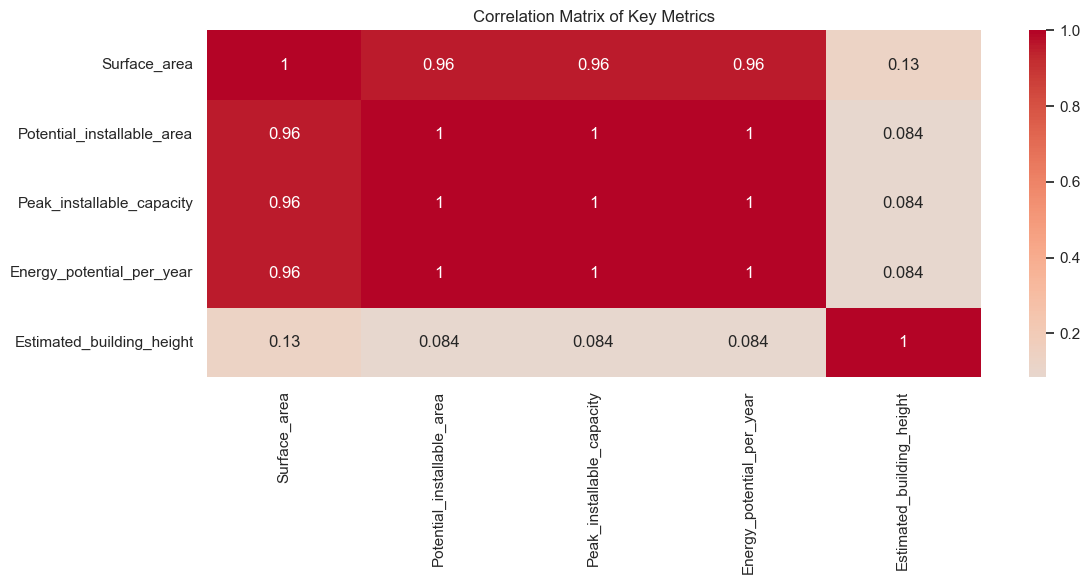

In [85]:
numeric_cols = ['Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 
                'Energy_potential_per_year', 'Estimated_building_height']
correlation = df[numeric_cols].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Metrics')
plt.tight_layout()


Text(0, 0.5, 'Energy Potential per Year')

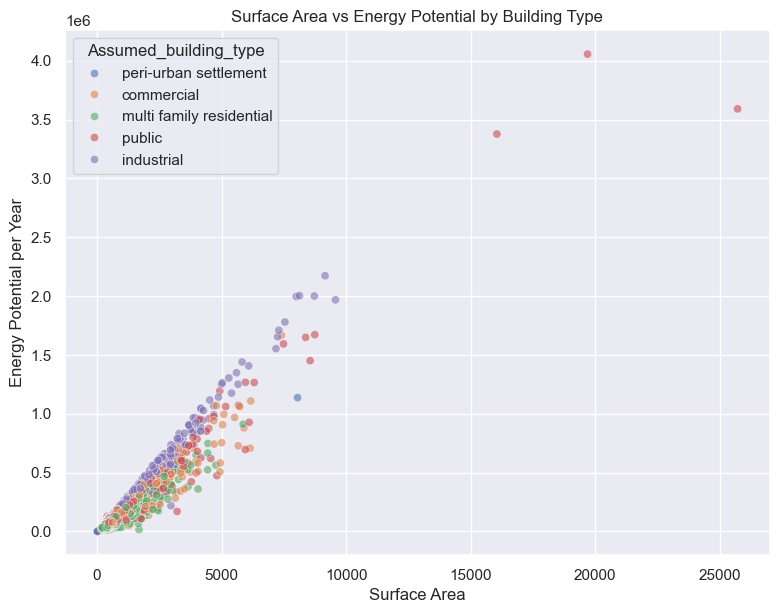

In [86]:
plt.figure(figsize=(20, 15))

# 1. Surface Area vs Energy Potential Scatter Plot
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Surface_area', y='Energy_potential_per_year', 
                hue='Assumed_building_type', alpha=0.6)
plt.title('Surface Area vs Energy Potential by Building Type')
plt.xlabel('Surface Area')
plt.ylabel('Energy Potential per Year')

## they are co related

Text(0, 0.5, 'Estimated Height')

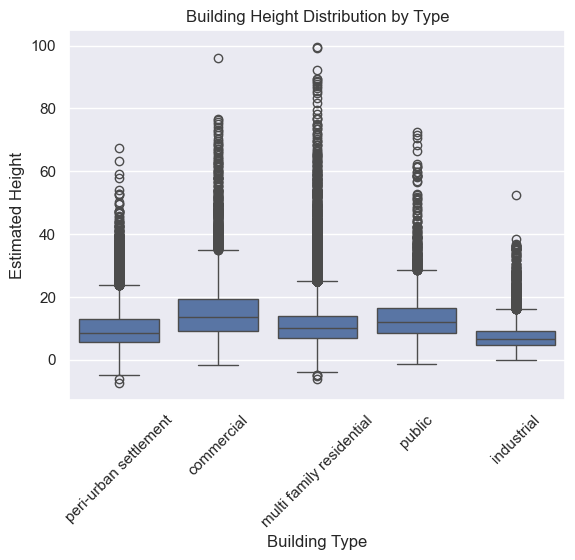

In [87]:
# 2. Building Height Distribution
plt.subplot(1, 1,1)
sns.boxplot(data=df, x='Assumed_building_type', y='Estimated_building_height')
plt.xticks(rotation=45)
plt.title('Building Height Distribution by Type')
plt.xlabel('Building Type')
plt.ylabel('Estimated Height')

Text(0, 0.5, 'Count')

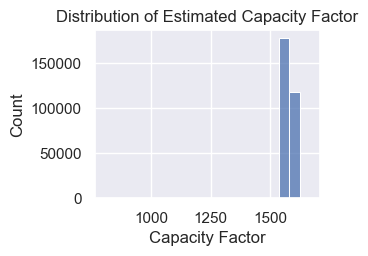

In [88]:
# 3. Capacity Factor Distribution
plt.subplot(2, 2, 3)
sns.histplot(data=df[df['Estimated_capacity_factor'].notna()], 
             x='Estimated_capacity_factor', bins=20)
plt.title('Distribution of Estimated Capacity Factor')
plt.xlabel('Capacity Factor')
plt.ylabel('Count')

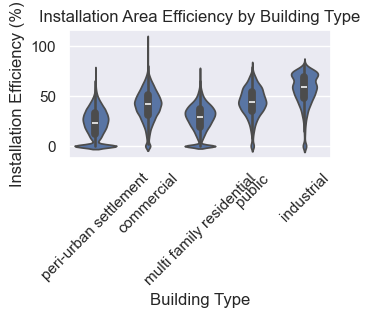

In [89]:
# 4. Installation Area Efficiency
df['Installation_efficiency'] = (df['Potential_installable_area'] / df['Surface_area']) * 100
plt.subplot(2, 2, 4)
sns.violinplot(data=df, x='Assumed_building_type', y='Installation_efficiency')
plt.xticks(rotation=45)
plt.title('Installation Area Efficiency by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Installation Efficiency (%)')
plt.tight_layout()

In [90]:
# Additional analysis: Energy potential per surface area
print("\nAverage Energy Potential per Surface Area by Building Type:")
efficiency_by_type = df.groupby('Assumed_building_type').agg({
    'Energy_potential_per_year': 'sum',
    'Surface_area': 'sum'
}).assign(
    energy_density=lambda x: x['Energy_potential_per_year'] / x['Surface_area']
).round(2)
print(efficiency_by_type['energy_density'])


Average Energy Potential per Surface Area by Building Type:
Assumed_building_type
commercial                  147.61
industrial                  205.47
multi family residential    112.01
peri-urban settlement        86.88
public                      158.84
Name: energy_density, dtype: float64


In [10]:

groupeddf=df.groupby('Assumed_building_type')
 # Calculate efficiency score


In [22]:
for key, count in groupeddf:
    print(key+" : " + str(count['Assumed_building_type'].count()))


commercial : 12557
industrial : 5763
multi family residential : 196225
peri-urban settlement : 76923
public : 5220


In [ ]:
groupedAVG=groupeddf.agg({
            'Surface_area': 'mean',
            'Potential_installable_area': 'mean',
            'Peak_installable_capacity': 'mean',
            'Energy_potential_per_year': 'mean',
            'Estimated_building_height':'mean',
            'Estimated_capacity_factor':"mean",
            'Estimated_tilt':"mean",
        }).to_dict(orient='index'),

In [16]:
print("Avg Space Utilized")
for key, avg_space_utilization in groupeddf:
  space=(avg_space_utilization['Potential_installable_area'].sum() / df['Surface_area'].sum() * 100)
  print("for " + key + ":" + str(space) + "%")


Avg Space Utilized
for commercial:4.833032247570655%
for industrial:4.566732449707831%
for multi family residential:24.356086114039016%
for peri-urban settlement:3.0493120990412605%
for public:2.9353123960958616%


In [18]:
#'buildings_with_zero_potential': ,
print("buildings with zero potential")
for key, buildings_with_zero_potential in groupeddf:
  zero=len(buildings_with_zero_potential[buildings_with_zero_potential['Energy_potential_per_year'] == 0])
  print("in " + key + ":" + str(zero))



buildings with zero potential
in commercial:360
in industrial:146
in multi family residential:19367
in peri-urban settlement:13007
in public:104


In [23]:
#'buildings_with_high_potential': len(dfcopy[dfcopy['Energy_potential_per_year'] > dfcopy['Energy_potential_per_year'].mean()])

print("buildings with high potential")
for key, buildings_with_high_potential in groupeddf:
  high=len(buildings_with_high_potential[buildings_with_high_potential['Energy_potential_per_year'] > buildings_with_high_potential['Energy_potential_per_year'].mean()])
  print(key + ":" + str(high))




buildings with high potential
commercial:3658
industrial:1697
multi family residential:60183
peri-urban settlement:26482
public:1515


In [29]:
pivot_table = pd.pivot_table(
    df,
    values=[
        'Surface_area',
        'Potential_installable_area',
        'Peak_installable_capacity',
        'Energy_potential_per_year',
        'Estimated_building_height',
        'Estimated_capacity_factor',
        'Estimated_tilt',
    ],
    index=['Assumed_building_type'],  # Replace with your actual grouping column name
    aggfunc='mean'
)

print(pivot_table)

                          Energy_potential_per_year  \
Assumed_building_type                                 
commercial                             46913.500054   
industrial                             96782.299502   
multi family residential               15126.229129   
peri-urban settlement                   4826.871642   
public                                 68303.998138   

                          Estimated_building_height  \
Assumed_building_type                                 
commercial                                15.075818   
industrial                                 7.826765   
multi family residential                  10.894884   
peri-urban settlement                      9.800880   
public                                    13.195120   

                          Estimated_capacity_factor  Estimated_tilt  \
Assumed_building_type                                                 
commercial                              1580.617080        5.182241   
industrial     

In [93]:


def analyze_surface_area_optimization():
    """Analyze surface area utilization and optimization potential"""
    # Calculate utilization ratio
    df['utilization_ratio'] = df['Potential_installable_area'] / df['Surface_area'] * 100
    
    # Group by building type and calculate mean metrics
    utilization_analysis = df.groupby('Assumed_building_type').agg({
        'Surface_area': 'mean',
        'Potential_installable_area': 'mean',
        'utilization_ratio': 'mean'
    }).round(2)
    
    # Calculate efficiency score
    utilization_analysis['efficiency_score'] = (
        utilization_analysis['utilization_ratio'] * 
        utilization_analysis['Potential_installable_area']
    ).round(2)
    
    return utilization_analysis

def analyze_energy_potential_by_building():
    """Analyze energy potential across different building types"""
    energy_analysis = df.groupby('Assumed_building_type').agg({
        'Energy_potential_per_year': ['mean', 'sum'],
        'Surface_area': 'mean',
        'Peak_installable_capacity': 'mean'
    }).round(2)
    
    # Calculate energy efficiency ratio
    energy_analysis['energy_per_area'] = (
        energy_analysis[('Energy_potential_per_year', 'sum')] / 
        energy_analysis[('Surface_area', 'mean')]
    ).round(2)
    
    return energy_analysis



def analyze_capacity_factor():
    """Analyze capacity factor patterns and implications"""
    capacity_analysis = df.groupby('Assumed_building_type').agg({
        'Estimated_capacity_factor': ['mean', 'std'],
        'Energy_potential_per_year': 'mean'
    }).round(2)
    
    # Calculate performance efficiency
    capacity_analysis['performance_ratio'] = (
        capacity_analysis[('Energy_potential_per_year', 'mean')] / 
        capacity_analysis[('Estimated_capacity_factor', 'mean')]
    ).round(2)
    
    return capacity_analysis

def analyze_tilt_impact():
    """Analyze the impact of tilt on energy potential"""
    # Since all tilts are same, we'll calculate theoretical optimal tilt
    # Based on Karachi's latitude (24.8607° N)
    latitude = 24.8607
    optimal_tilt = latitude * 0.76  # General rule of thumb for optimal tilt
    
    tilt_analysis = {
        'current_tilt': df['Estimated_tilt'].mean(),
        'optimal_tilt': optimal_tilt,
        'tilt_difference': optimal_tilt - df['Estimated_tilt'].mean(),
        'potential_improvement': abs(optimal_tilt - df['Estimated_tilt'].mean()) * 0.5  # Estimated improvement percentage
    }
    
    return tilt_analysis


# Print results with insights


In [94]:
print("1. Surface Area Optimization Analysis:")
print( analyze_surface_area_optimization())


1. Surface Area Optimization Analysis:
                          Surface_area  Potential_installable_area  \
Assumed_building_type                                                
commercial                      317.81                      152.89   
industrial                      471.03                      314.78   
multi family residential        135.05                       49.31   
peri-urban settlement            55.56                       15.75   
public                          430.02                      223.38   

                          utilization_ratio  efficiency_score  
Assumed_building_type                                          
commercial                            40.32           6164.52  
industrial                            55.98          17621.38  
multi family residential              27.45           1353.56  
peri-urban settlement                 22.35            352.01  
public                                43.70           9761.71  


In [95]:
print("\n2. Energy Potential by Building Type:")
print( analyze_energy_potential_by_building())



2. Energy Potential by Building Type:
                         Energy_potential_per_year               Surface_area  \
                                              mean           sum         mean   
Assumed_building_type                                                           
commercial                                46913.50  5.890928e+08       317.81   
industrial                                96782.30  5.577564e+08       471.03   
multi family residential                  15126.23  2.968144e+09       135.05   
peri-urban settlement                      4826.87  3.712974e+08        55.56   
public                                    68304.00  3.565469e+08       430.02   

                         Peak_installable_capacity energy_per_area  
                                              mean                  
Assumed_building_type                                               
commercial                                   29.66      1853600.64  
industrial                          

In [96]:
print("\n5. Tilt Impact Analysis:")
print( analyze_tilt_impact())


5. Tilt Impact Analysis:
{'current_tilt': 4.929898782559457, 'optimal_tilt': 18.894132000000003, 'tilt_difference': 13.964233217440546, 'potential_improvement': 6.982116608720273}


In [97]:
features = ['Surface_area', 'Potential_installable_area', 'Peak_installable_capacity',
                        'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor']
        
X = df[features]
y = df['Energy_potential_per_year']
        
        # Split data
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        

In [98]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [99]:


def evaluate_model(model_name, model, X_train, X_test, y_train, y_test):
    print(f"\n{'='*50}")
    print(f"{model_name} Analysis")
    print(f"{'='*50}")
    
    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Create bins for classification metrics
    y_test_binned = pd.qcut(y_test, q=4, labels=['Low', 'Medium', 'High', 'Very High'])
    y_pred_binned = pd.qcut(y_pred, q=4, labels=['Low', 'Medium', 'High', 'Very High'])
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_binned, y_pred_binned)
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test_binned, y_pred_binned))
    
    # Print accuracy
    print(f"\nAccuracy Score: {accuracy:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test_binned, y_pred_binned)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Low', 'Medium', 'High', 'Very High'],
                yticklabels=['Low', 'Medium', 'High', 'Very High'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    
    # Return model and predictions for further analysis
    return model, y_pred, accuracy

def analyze_linear_regression(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    return evaluate_model('Linear Regression', model, X_train, X_test, y_train, y_test)

def analyze_ridge_regression(X_train, X_test, y_train, y_test):
    model = Ridge()
    return evaluate_model('Ridge Regression', model, X_train, X_test, y_train, y_test)

def analyze_lasso_regression(X_train, X_test, y_train, y_test):
    model = Lasso()
    return evaluate_model('Lasso Regression', model, X_train, X_test, y_train, y_test)

def analyze_decision_tree(X_train, X_test, y_train, y_test, feature_names):
    model = DecisionTreeRegressor(max_depth=5, random_state=42)
    trained_model, y_pred, accuracy = evaluate_model('Decision Tree', model, X_train, X_test, y_train, y_test)
    
    # Plot decision tree
    plt.figure(figsize=(20,10))
    plot_tree(trained_model, feature_names=feature_names, filled=True, rounded=True, fontsize=10)
    plt.title("Decision Tree Structure")
    plt.show()
    
    # Print feature importance
    importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': trained_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    print("\nFeature Importance:")
    print(importance)
    
    return trained_model, y_pred, accuracy

def analyze_random_forest(X_train, X_test, y_train, y_test, feature_names):
    model = RandomForestRegressor(n_estimators=5, random_state=42)
    trained_model, y_pred, accuracy = evaluate_model('Random Forest', model, X_train, X_test, y_train, y_test)
    
    # Print feature importance
    importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': trained_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    print("\nFeature Importance:")
    print(importance)
    
    return trained_model, y_pred, accuracy

def analyze_gradient_boosting(X_train, X_test, y_train, y_test, feature_names):
    model = GradientBoostingRegressor(random_state=42)
    trained_model, y_pred, accuracy = evaluate_model('Gradient Boosting', model, X_train, X_test, y_train, y_test)
    
    # Print feature importance
    importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': trained_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    print("\nFeature Importance:")
    print(importance)
    
    return trained_model, y_pred, accuracy






Linear Regression Analysis

Classification Report:
              precision    recall  f1-score   support

        High       0.98      0.98      0.98     14834
         Low       0.97      0.97      0.97     14835
      Medium       0.96      0.96      0.96     14834
   Very High       1.00      1.00      1.00     14835

    accuracy                           0.98     59338
   macro avg       0.98      0.98      0.98     59338
weighted avg       0.98      0.98      0.98     59338


Accuracy Score: 0.9775


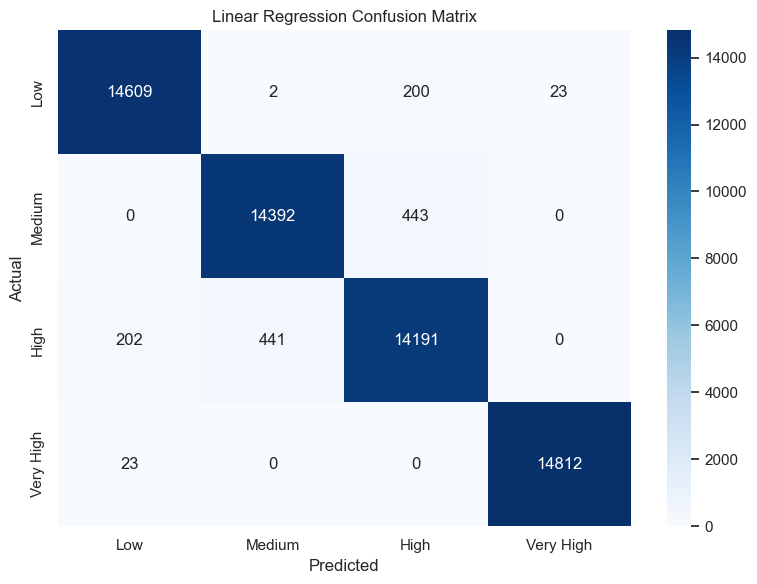

In [100]:
results = {}
 
 # Run all models
results['Linear Regression'] = analyze_linear_regression(X_train, X_test, y_train, y_test)

 
# Run the analysis



Ridge Regression Analysis

Classification Report:
              precision    recall  f1-score   support

        High       0.98      0.98      0.98     14834
         Low       0.97      0.97      0.97     14835
      Medium       0.96      0.96      0.96     14834
   Very High       1.00      1.00      1.00     14835

    accuracy                           0.98     59338
   macro avg       0.98      0.98      0.98     59338
weighted avg       0.98      0.98      0.98     59338


Accuracy Score: 0.9775


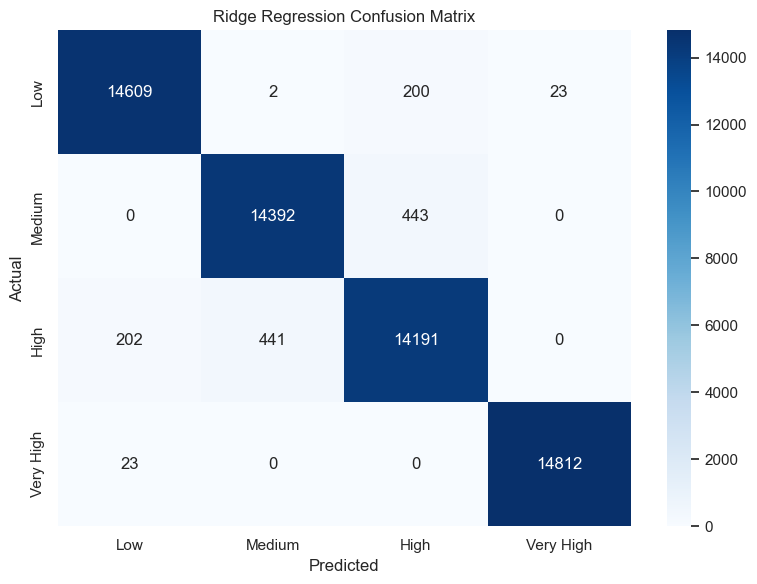

In [101]:
results['Ridge Regression'] = analyze_ridge_regression(X_train, X_test, y_train, y_test)



Lasso Regression Analysis


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.574e+10, tolerance: 3.755e+10
  model = cd_fast.enet_coordinate_descent(



Classification Report:
              precision    recall  f1-score   support

        High       0.98      0.98      0.98     14834
         Low       0.97      0.97      0.97     14835
      Medium       0.96      0.96      0.96     14834
   Very High       1.00      1.00      1.00     14835

    accuracy                           0.98     59338
   macro avg       0.98      0.98      0.98     59338
weighted avg       0.98      0.98      0.98     59338


Accuracy Score: 0.9774


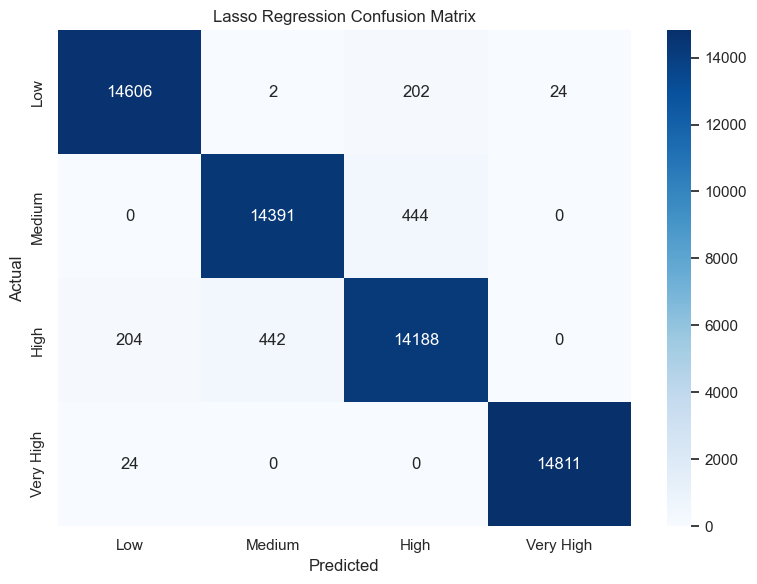

In [102]:
results['Lasso Regression'] = analyze_lasso_regression(X_train, X_test, y_train, y_test)
 


Random Forest Analysis

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00     14834
         Low       1.00      1.00      1.00     14835
      Medium       1.00      1.00      1.00     14834
   Very High       1.00      1.00      1.00     14835

    accuracy                           1.00     59338
   macro avg       1.00      1.00      1.00     59338
weighted avg       1.00      1.00      1.00     59338


Accuracy Score: 0.9995


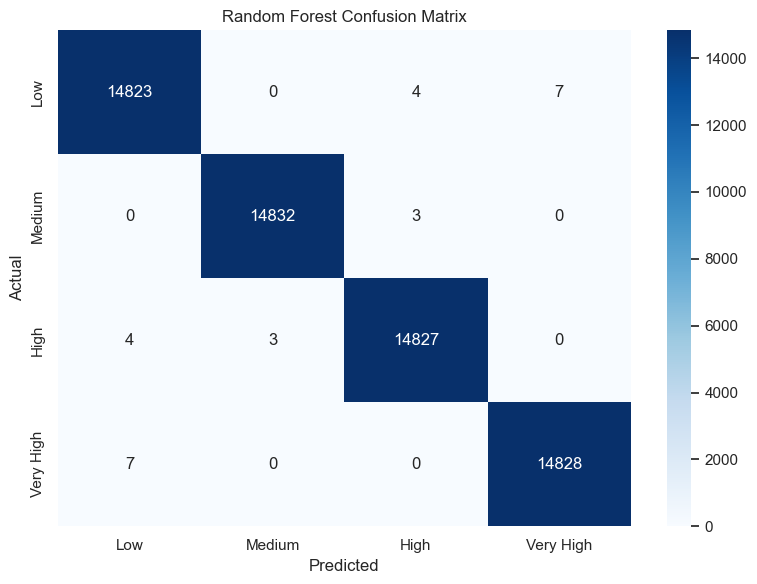


Feature Importance:
                      Feature  Importance
2   Peak_installable_capacity    0.593248
1  Potential_installable_area    0.400660
0                Surface_area    0.004178
4   Estimated_building_height    0.001623
5   Estimated_capacity_factor    0.000188
3              Estimated_tilt    0.000104


In [103]:
results['Random Forest'] = analyze_random_forest(X_train, X_test, y_train, y_test, features)



Gradient Boosting Analysis

Classification Report:
              precision    recall  f1-score   support

        High       0.98      0.97      0.97     14834
         Low       0.98      0.99      0.99     14835
      Medium       0.97      0.97      0.97     14834
   Very High       0.99      0.99      0.99     14835

    accuracy                           0.98     59338
   macro avg       0.98      0.98      0.98     59338
weighted avg       0.98      0.98      0.98     59338


Accuracy Score: 0.9798


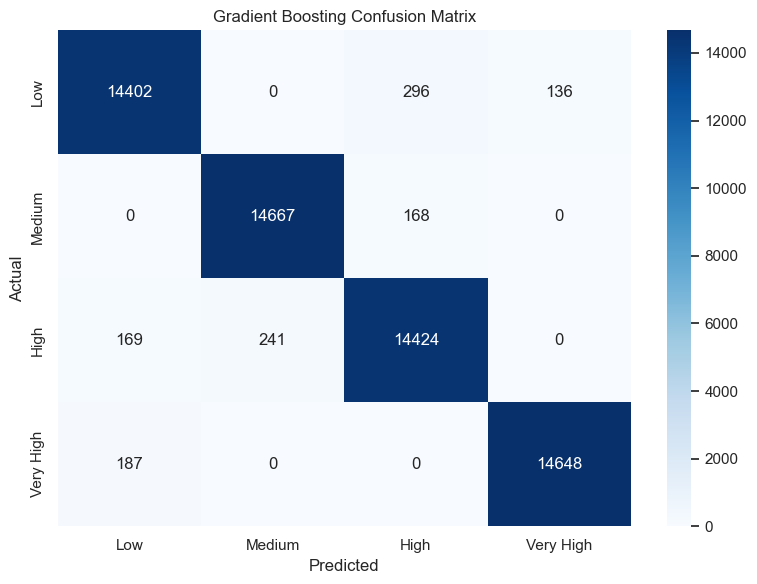


Feature Importance:
                      Feature  Importance
2   Peak_installable_capacity    0.611015
1  Potential_installable_area    0.383824
0                Surface_area    0.004870
5   Estimated_capacity_factor    0.000176
4   Estimated_building_height    0.000080
3              Estimated_tilt    0.000035


In [104]:
results['Gradient Boosting'] = analyze_gradient_boosting(X_train, X_test, y_train, y_test, features)

 


In [105]:

accuracies = pd.DataFrame({
     'Model': results.keys(),
     'Accuracy': [result[2] for result in results.values()]
 }).sort_values('Accuracy', ascending=False)
 
print("\nModel Accuracy Comparison:")
print("=========================")
print(accuracies)
    


Model Accuracy Comparison:
               Model  Accuracy
3      Random Forest  0.999528
4  Gradient Boosting  0.979827
0  Linear Regression  0.977519
1   Ridge Regression  0.977519
2   Lasso Regression  0.977384



Decision Tree Performance Metrics:
R2 Score: 0.9113
Mean Squared Error: 160151293.2536
Root Mean Squared Error: 12655.0896
Mean Absolute Error: 4797.0864

Feature Importance:
                      Feature  Importance
2   Peak_installable_capacity      0.9147
1  Potential_installable_area      0.0853
0                Surface_area      0.0000
3              Estimated_tilt      0.0000
4   Estimated_building_height      0.0000
5   Estimated_capacity_factor      0.0000


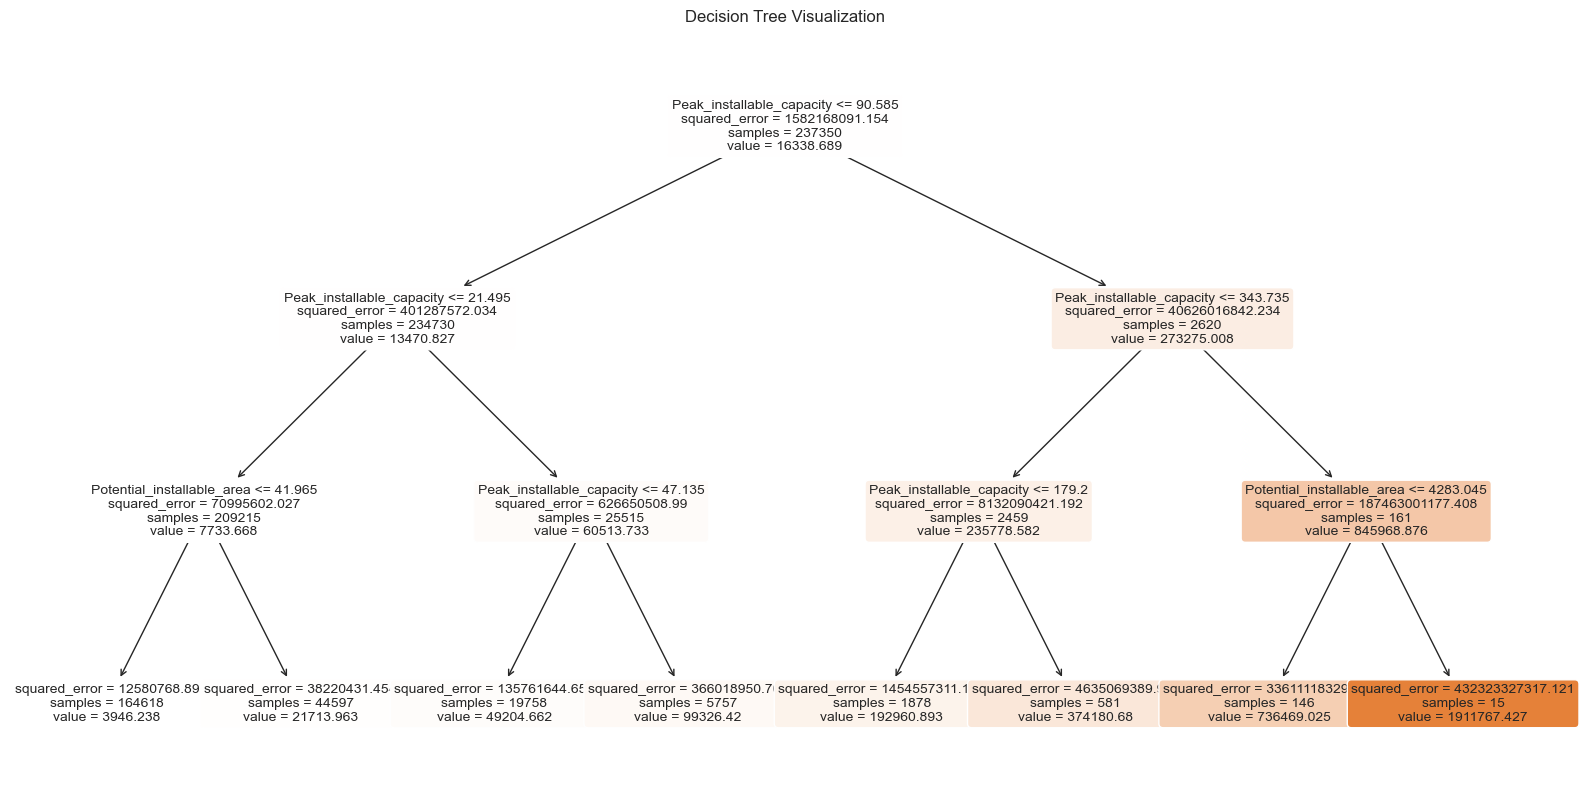

In [112]:


# Function to train decision tree and get performance metrics
def train_and_evaluate_decision_tree():  # Reduced max_depth for better visualization
    
    dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)
    dt_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = dt_model.predict(X_test)
    
    # Calculate performance metrics
    metrics = {
        'R2 Score': r2_score(y_test, y_pred),
        'Mean Squared Error': mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(mean_squared_error(y_test, y_pred)),
        'Mean Absolute Error': mean_absolute_error(y_test, y_pred)
    }
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': dt_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    return metrics, feature_importance,dt_model

# Function to visualize decision tree
def visualize_tree(model, feature_names):
    plt.figure(figsize=(20,10))
    plot_tree(model, 
             feature_names=feature_names,
             filled=True,
             rounded=True,
             fontsize=10)
    plt.title("Decision Tree Visualization")
    plt.show();

# Load and prepare the data

# Train model and get metrics
metrics, feature_importance,dTmodel = train_and_evaluate_decision_tree()

# Print results
print("\nDecision Tree Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nFeature Importance:")
print(feature_importance)

# Visualize the tree
visualize_tree(dTmodel, features)